# Model Testing

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

## Load Datasets and Combine into One

In [2]:
user_test_ratings = pd.read_csv("D:/MovieRecommender/Data/user_test_ratings.csv")
movies = pd.read_csv("D:/MovieRecommender/Data/movies_cleaned.csv")
user_test_ratings.head()

,Date,Name,Year,Letterboxd URI,Rating
0,2023-02-15,Chef,2014,https://boxd.it/6lCG,4.00
1,2023-02-20,American History X,1998,https://boxd.it/2bdo,3.00
2,2023-03-06,"I Love You, Man",2009,https://boxd.it/1JZu,4.00
3,2023-03-06,She's All That,1999,https://boxd.it/1Wz0,3.00
4,2023-03-07,Notting Hill,1999,https://boxd.it/2aeK,4.00


In [3]:
movies.shape

(26537, 30)

In [4]:
user_test_ratings = user_test_ratings.rename(columns={'Name' : 'name', 'Rating':'userRating', 'Year' : 'date'})
user_test_ratings = user_test_ratings.drop(columns=['Date', 'Letterboxd URI'])
user_test_ratings.head()

,name,date,userRating
0,Chef,2014,4.00
1,American History X,1998,3.00
2,"I Love You, Man",2009,4.00
3,She's All That,1999,3.00
4,Notting Hill,1999,4.00


In [5]:
user_test_ratings.shape

(66, 3)

In [6]:
movies_with_user = pd.merge(user_test_ratings, movies, how='inner', on=['name', 'date'])
movies_with_user.head()

,name,date,userRating,id,tagline,description,minute,rating,poster,adult,num_votes,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,english
0,Chef,2014,4.00,1000996.00,Starting from scratch never tasted so good.,When Chef Carl Casper suddenly quits his job a...,114.00,3.68,https://a.ltrbxd.com/resized/film-poster/1/5/1...,True,56.33,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,American History X,1998,3.00,1000512.00,Some Legacies Must End.,Derek Vineyard is paroled after serving 3 year...,119.00,4.13,https://a.ltrbxd.com/resized/sm/upload/ob/wg/l...,True,106.32,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
2,"I Love You, Man",2009,4.00,1002277.00,He needed a best man... He got the worst.,Peter Klaven is a successful real estate agent...,105.00,3.34,https://a.ltrbxd.com/resized/sm/upload/g5/p3/6...,True,40.57,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
3,She's All That,1999,3.00,1001461.00,These two opposites attract... but EVERYONE'S ...,High school hotshot Zach Siler is the envy of ...,95.00,2.87,https://a.ltrbxd.com/resized/film-poster/4/6/3...,True,44.98,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
4,Notting Hill,1999,4.00,1000418.00,Can the most famous film star in the world fal...,William Thacker is a London bookstore owner wh...,124.00,3.63,https://a.ltrbxd.com/resized/sm/upload/pa/ej/k...,True,76.70,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True


In [7]:
movies_with_user.shape

(61, 31)

In [8]:
print(movies_with_user.duplicated(subset=['name']).sum())

0


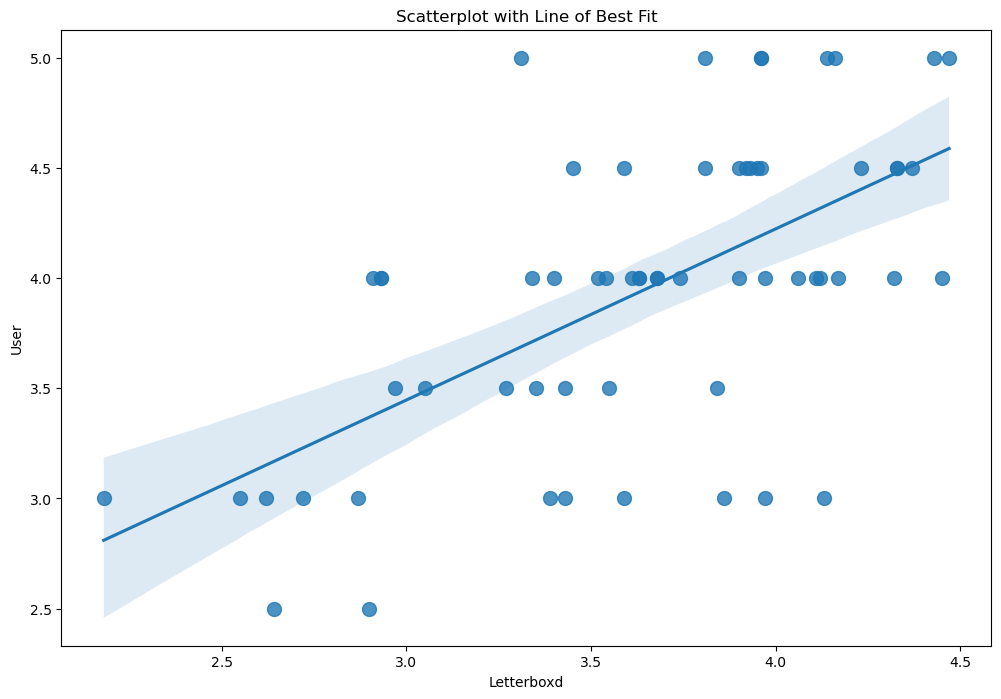

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.regplot(x='rating', y='userRating', data=movies_with_user, scatter_kws={'s': 100})  # s controls marker size
plt.title('Scatterplot with Line of Best Fit')
plt.xlabel('Letterboxd')
plt.ylabel('User')
plt.show()

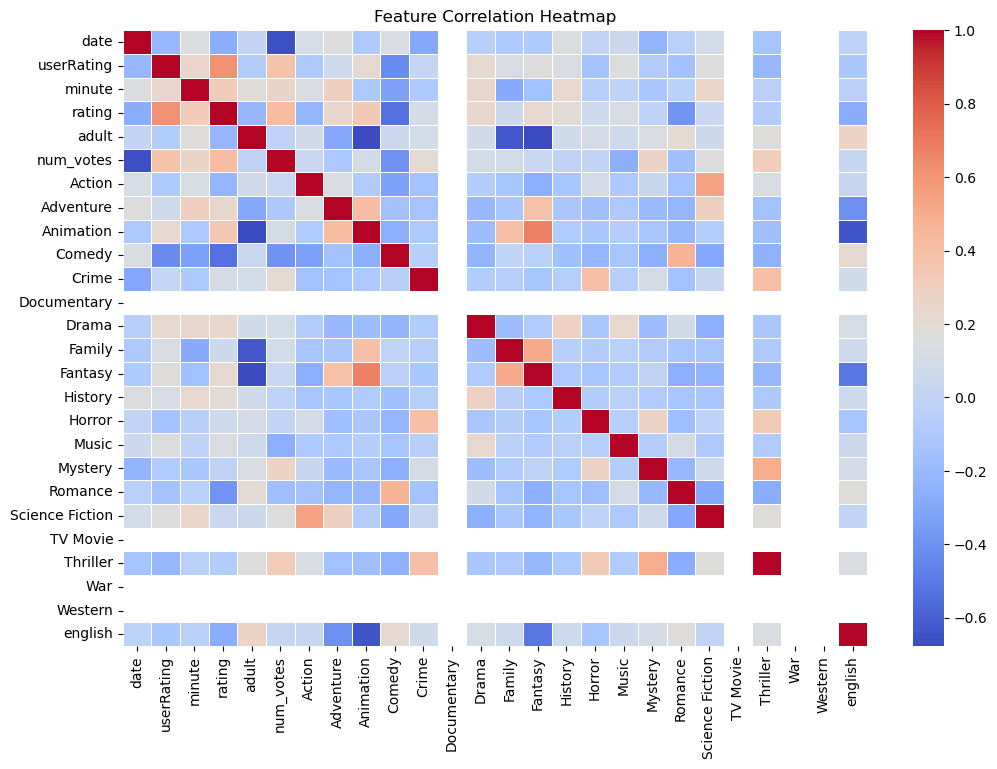

In [10]:
corr_matrix = movies_with_user.drop(columns=['name', 'poster', 'description', 'tagline', 'id']).corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidth=.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [11]:
print(corr_matrix.loc['userRating', :])

date              -0.21
userRating         1.00
minute             0.24
rating             0.61
adult             -0.07
num_votes          0.38
Action            -0.09
Adventure          0.07
Animation          0.22
Comedy            -0.42
Crime              0.02
Documentary         NaN
Drama              0.22
Family             0.13
Fantasy            0.17
History            0.13
Horror            -0.15
Music              0.15
Mystery           -0.08
Romance           -0.15
Science Fiction    0.16
TV Movie            NaN
Thriller          -0.21
War                 NaN
Western             NaN
english           -0.11
Name: userRating, dtype: float64


In [12]:
merged_df = pd.merge(movies, user_test_ratings, how='outer', on=['name', 'date'])

movies_no_user = merged_df[merged_df['userRating'].isnull()].drop(columns='userRating')
movies_no_user.head()

,id,name,date,tagline,description,minute,rating,poster,adult,num_votes,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,english
0,1008245.00,"""Sr.""",2022.00,Like father. Like son. Like no other.,A portrait of the life and career of Robert Do...,90.00,3.68,https://a.ltrbxd.com/resized/film-poster/9/1/3...,True,7.07,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,1053441.00,#1 Cheerleader Camp,2010.00,Grab your spirit sticks!,A pair of horny college guys get summer jobs a...,95.00,2.38,https://a.ltrbxd.com/resized/film-poster/2/3/6...,True,9.54,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,1002506.00,#Alive,2020.00,You must survive.,"As a grisly virus rampages a city, a lone man ...",98.00,3.06,https://a.ltrbxd.com/resized/film-poster/5/4/1...,True,41.58,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
3,1033427.00,#AnneFrank. Parallel Stories,2019.00,NaN,One single Anne Frank moves us more than the c...,92.00,3.31,https://a.ltrbxd.com/resized/film-poster/5/3/7...,True,6.93,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,True
4,1055800.00,#ChadGetsTheAxe,2022.00,NaN,Four social media influencers livestream their...,83.00,3.20,https://a.ltrbxd.com/resized/film-poster/9/4/8...,True,2.24,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True


### Drop genre columns that have less than 5 requency

In [13]:
column_sums = movies_with_user.loc[:, 'Action':].sum()
columns_to_drop = column_sums[column_sums < 1].index
movies_with_user = movies_with_user.drop(columns=columns_to_drop)
movies_no_user =  movies_no_user.drop(columns=columns_to_drop)

if (~movies_with_user['english']).sum() < 1:
    movies_with_user = movies_with_user.drop(columns='english')
    movies_no_user = movies_no_user.drop(columns='english')

movies_with_user.head()


,name,date,userRating,id,tagline,description,minute,rating,poster,adult,num_votes,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,english
0,Chef,2014,4.00,1000996.00,Starting from scratch never tasted so good.,When Chef Carl Casper suddenly quits his job a...,114.00,3.68,https://a.ltrbxd.com/resized/film-poster/1/5/1...,True,56.33,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
1,American History X,1998,3.00,1000512.00,Some Legacies Must End.,Derek Vineyard is paroled after serving 3 year...,119.00,4.13,https://a.ltrbxd.com/resized/sm/upload/ob/wg/l...,True,106.32,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
2,"I Love You, Man",2009,4.00,1002277.00,He needed a best man... He got the worst.,Peter Klaven is a successful real estate agent...,105.00,3.34,https://a.ltrbxd.com/resized/sm/upload/g5/p3/6...,True,40.57,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True
3,She's All That,1999,3.00,1001461.00,These two opposites attract... but EVERYONE'S ...,High school hotshot Zach Siler is the envy of ...,95.00,2.87,https://a.ltrbxd.com/resized/film-poster/4/6/3...,True,44.98,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True
4,Notting Hill,1999,4.00,1000418.00,Can the most famous film star in the world fal...,William Thacker is a London bookstore owner wh...,124.00,3.63,https://a.ltrbxd.com/resized/sm/upload/pa/ej/k...,True,76.70,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True


## Model Testing

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
# from sklearn.preprocessing import StandardScaler

### Train Test Split

In [15]:
features = movies_with_user.drop(columns=['userRating', 'name', 'description', 'poster', 'tagline', 'id'])
target = movies_with_user['userRating']

num_features = ['rating', 'date', 'minute']
one_hot_features = movies_with_user.loc[:, 'Action':].columns

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

features.head()

,date,minute,rating,adult,num_votes,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,english
0,2014,114.00,3.68,True,56.33,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
1,1998,119.00,4.13,True,106.32,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
2,2009,105.00,3.34,True,40.57,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True
3,1999,95.00,2.87,True,44.98,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True
4,1999,124.00,3.63,True,76.70,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True


### Standardize Numerial Features

In [16]:
'''scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[num_features])
X_test_num_scaled = scaler.transform(X_test[num_features])

# Creating DataFrames from the scaled numerical features
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=num_features)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=num_features)

# Concatenating the scaled numerical features and the one-hot encoded features
X_train_scaled = pd.concat([X_train_num_scaled.reset_index(drop=True), X_train[one_hot_features].reset_index(drop=True)], axis=1)
X_test_scaled = pd.concat([X_test_num_scaled.reset_index(drop=True), X_test[one_hot_features].reset_index(drop=True)], axis=1)

X_train_scaled = X_train_scaled.sort_values(by=['rating'], ascending=False)


X_train_scaled.head()'''

"scaler = StandardScaler()\nX_train_num_scaled = scaler.fit_transform(X_train[num_features])\nX_test_num_scaled = scaler.transform(X_test[num_features])\n\n# Creating DataFrames from the scaled numerical features\nX_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=num_features)\nX_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=num_features)\n\n# Concatenating the scaled numerical features and the one-hot encoded features\nX_train_scaled = pd.concat([X_train_num_scaled.reset_index(drop=True), X_train[one_hot_features].reset_index(drop=True)], axis=1)\nX_test_scaled = pd.concat([X_test_num_scaled.reset_index(drop=True), X_test[one_hot_features].reset_index(drop=True)], axis=1)\n\nX_train_scaled = X_train_scaled.sort_values(by=['rating'], ascending=False)\n\n\nX_train_scaled.head()"

I tried multiple models on standardized and non-standardized data and they performed better on non-standardized so I am commenting this out. 

In [17]:
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import numpy as np


### Test different model types
Testing different model types on some basic data to see which might perform best in the app. 

In [18]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

results={}

for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error' )
    cv_rmse = np.sqrt(-cv_scores)
    results[model_name] = {
        'CV Mean RMSE' : np.mean(cv_rmse),
        'CV Std RMSE': np.std(cv_rmse)
    }

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)

    results[model_name]['Test MAE'] = test_mae
    results[model_name]['Test R2'] = test_r2

for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric_name, metric_value in metrics.items():
        print(f" {metric_name}: {metric_value:.4f}")

Linear Regression:
 CV Mean RMSE: 0.8552
 CV Std RMSE: 0.1912
 Test MAE: 0.5079
 Test R2: 0.1928
Ridge Regression:
 CV Mean RMSE: 0.6433
 CV Std RMSE: 0.1131
 Test MAE: 0.4428
 Test R2: 0.4591
Lasso Regression:
 CV Mean RMSE: 0.6450
 CV Std RMSE: 0.1077
 Test MAE: 0.5135
 Test R2: 0.1842
Random Forest:
 CV Mean RMSE: 0.6469
 CV Std RMSE: 0.1523
 Test MAE: 0.5147
 Test R2: 0.2138
Support Vector Machine:
 CV Mean RMSE: 0.6887
 CV Std RMSE: 0.0974
 Test MAE: 0.5309
 Test R2: -0.0025
K-Nearest Neighbors:
 CV Mean RMSE: 0.6812
 CV Std RMSE: 0.1262
 Test MAE: 0.5500
 Test R2: 0.1319


Looks like Ridge Regression perfroms the best. That will also be a nice model to use due to its feature interpretability. 

### Hyperparameter tuning and model fitting

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV


# Define the parameter grid
param_grid = {
    'alpha' : [0.001, 0.01, 0.1, 1, 10, 100],
    'fit_intercept' : [True, False],
    'max_iter' : [None, 100, 500, 1000],
    'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
    'random_state' : [42]

}

ridge = Ridge()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

c:\Users\ghohol\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ghohol\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ghohol\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ghohol\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ghohol\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ghohol\AppData\Local\anaco

Best parameters found:  {'alpha': 1, 'fit_intercept': False, 'max_iter': None, 'random_state': 42, 'solver': 'lsqr'}


c:\Users\ghohol\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ghohol\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ghohol\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ghohol\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ghohol\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ghohol\AppData\Local\anaco

In [20]:
# Train the model with the best parameters
best_ridge = grid_search.best_estimator_  
best_ridge.fit(X_train, y_train)

# Evaluate the model
y_pred = best_ridge.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R2: {r2:.4f}")

Test RMSE: 0.5251
Test MAE: 0.4141
Test R2: 0.4560


### Feature Importance

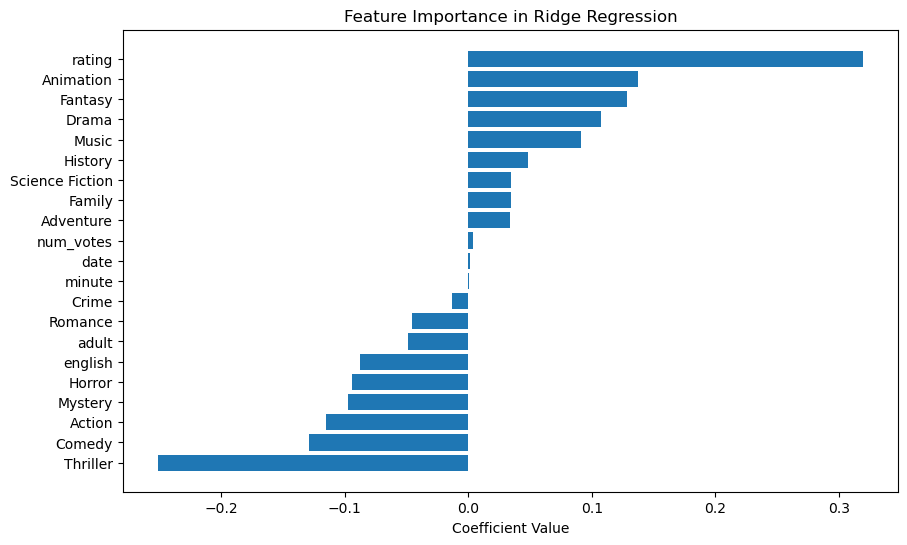

In [21]:
# Retrieve the coefficients
coefficients = best_ridge.coef_
feature_names = X_train.columns

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the DataFrame by value of coefficients
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)



plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Ridge Regression')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

This looks about right. Rating should dominate.

### Model Eval

In [22]:
preds = pd.DataFrame(data=y_pred, columns=['pred'])
preds['actual'] = y_test.values
preds['diff'] = preds['pred'] - preds['actual']
preds.head(20)



,pred,actual,diff
0,3.86,4.00,-0.14
1,3.57,2.50,1.07
2,4.40,5.00,-0.60
3,4.53,4.50,0.03
4,4.51,3.50,1.01
5,4.10,4.00,0.10
6,3.94,4.50,-0.56
7,3.42,3.00,0.42
8,3.94,4.00,-0.06
9,4.38,5.00,-0.62


Text(0.5, 1.0, 'Distribution of error')

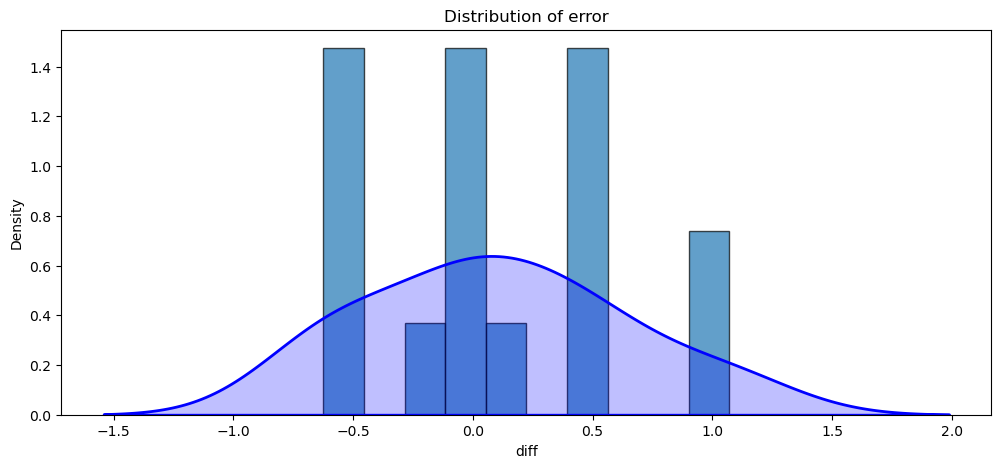

In [23]:
plt.figure(figsize=(12, 5))

plt.hist(preds['diff'], edgecolor='black', density=True, alpha=0.7)
sns.kdeplot(preds['diff'], color='blue', fill=True, linewidth=2)
plt.title('Distribution of error')

Text(0.5, 1.0, 'Distribution of Predictions')

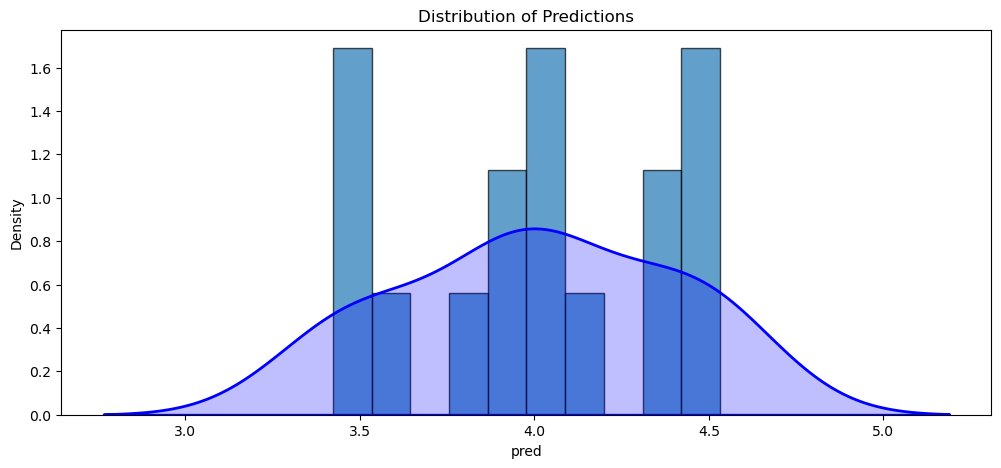

In [24]:
plt.figure(figsize=(12, 5))
plt.hist(preds['pred'], edgecolor='black', density=True, alpha=0.7)
sns.kdeplot(preds['pred'], color='blue', fill=True, linewidth=2)
plt.title("Distribution of Predictions")

## Prediction Test

In [25]:
movies_no_user_feat = movies_no_user.drop(columns=['name', 'description', 'poster', 'tagline'])
movies_no_user_feat = movies_no_user_feat.sort_values(by=['id'], ascending=True)
movies_no_user_feat.head()


,id,date,minute,rating,adult,num_votes,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,english
14664,1000002.00,2019.00,133.00,4.56,True,7.68,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False
6826,1000003.00,2022.00,140.00,4.30,True,78.70,True,True,False,True,False,False,False,False,False,False,False,False,False,True,False,True
7218,1000004.00,1999.00,139.00,4.27,True,169.66,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
11181,1000005.00,2016.00,129.00,4.09,True,128.29,False,False,False,True,False,True,False,False,False,False,True,False,True,False,False,True
10102,1000007.00,2014.00,169.00,4.35,True,186.28,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,True


In [26]:
'''no_user_scaled = scaler.fit_transform(movies_no_user_feat[num_features])

# Creating DataFrames from the scaled numerical features
no_user_scaled = pd.DataFrame(no_user_scaled, columns=num_features)

# Concatenating the scaled numerical features and the one-hot encoded features
no_user_scaled = pd.concat([no_user_scaled.reset_index(drop=True), movies_no_user_feat[one_hot_features].reset_index(drop=True)], axis=1)

no_user_scaled.head()'''


'no_user_scaled = scaler.fit_transform(movies_no_user_feat[num_features])\n\n# Creating DataFrames from the scaled numerical features\nno_user_scaled = pd.DataFrame(no_user_scaled, columns=num_features)\n\n# Concatenating the scaled numerical features and the one-hot encoded features\nno_user_scaled = pd.concat([no_user_scaled.reset_index(drop=True), movies_no_user_feat[one_hot_features].reset_index(drop=True)], axis=1)\n\nno_user_scaled.head()'

In [27]:
ratings = pd.DataFrame(columns=['id', 'userRating'])
ratings['id'] = movies_no_user['id'] 
ratings = ratings.sort_values(by='id')

ratings['userRating'] = best_ridge.predict(movies_no_user_feat.sort_values(by='id').drop(columns='id'))
ratings.head()


,id,userRating
14664,1000002.00,3.90
6826,1000003.00,4.12
7218,1000004.00,4.73
11181,1000005.00,4.44
10102,1000007.00,4.93


In [28]:
movies_no_user = pd.merge(movies_no_user, ratings, how='inner', on=['id'])

In [29]:
movies_no_user = movies_no_user.sort_values(by=['userRating'], ascending=False)
movies_no_user.head()

,id,name,date,tagline,description,minute,rating,poster,adult,num_votes,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,english,userRating
17751,1000030.00,Spirited Away,2001.00,Fantasy can be captivating,"A young girl, Chihiro, becomes trapped in a st...",125.00,4.45,https://a.ltrbxd.com/resized/film-poster/5/1/9...,False,126.87,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,4.94
10073,1000007.00,Interstellar,2014.00,Mankind was born on Earth. It was never meant ...,The adventures of a group of explorers who mak...,169.00,4.35,https://a.ltrbxd.com/resized/film-poster/1/1/7...,True,186.28,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,True,4.93
22982,1000068.00,The Shawshank Redemption,1994.00,Fear can hold you prisoner. Hope can set you f...,Imprisoned in the 1940s for the double murder ...,142.00,4.55,https://a.ltrbxd.com/resized/sm/upload/7l/hn/4...,True,162.61,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,4.77
21564,1000178.00,The Lion King,1994.00,Life's greatest adventure is finding your plac...,A young lion prince is cast out of his pride b...,89.00,4.22,https://a.ltrbxd.com/resized/sm/upload/lz/96/y...,False,133.63,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,True,4.76
7196,1000004.00,Fight Club,1999.00,Mischief. Mayhem. Soap.,A ticking-time-bomb insomniac and a slippery s...,139.00,4.27,https://a.ltrbxd.com/resized/film-poster/5/1/5...,True,169.66,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,4.73


In [30]:
movies_no_user['diff'] = movies_no_user['userRating'] - movies_no_user['rating']
movies_no_user = movies_no_user.sort_values(by=['diff'], ascending=False)

movies_no_user['diff'].head(10)

21350   2.19
231     2.17
22112   2.05
20162   2.05
6259    2.02
7019    2.02
17566   2.01
1825    1.99
21580   1.99
987     1.95
Name: diff, dtype: float64

Text(0.5, 1.0, 'Distribution of diff btwn pred and letterbox')

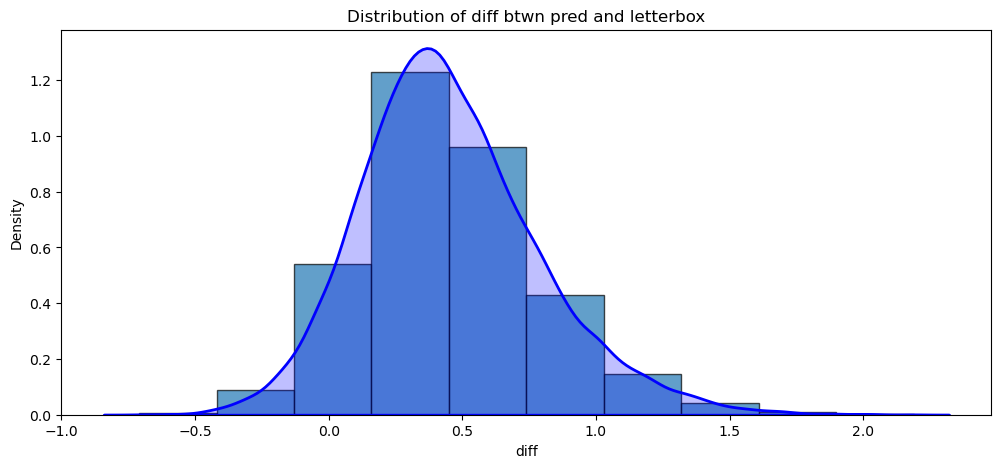

In [31]:
plt.figure(figsize=(12, 5))

plt.hist(movies_no_user['diff'], edgecolor='black', density=True, alpha=0.7)
sns.kdeplot(movies_no_user['diff'], color='blue', fill=True, linewidth=2)
plt.title('Distribution of diff btwn pred and letterbox')